# Introduction

To keep things simple, we will only use the following Python libraries:

* `numpy` for numerical operations
* `matplotlib` for plotting
* `scipy` for scientific computing (when needed)

Remember that our aim is to draw _random numbers_ from a given probability distribution. In most of the cases, our typical code will start with the following lines:

In [12]:
import matplotlib.pyplot as plt
import numpy as np

It is then a good idea to learn a few tricks about fixing random states. As we mentioned in the course, pseudorandom numbers often have a _seed_ that can be used to reproduce the same sequence of numbers. This is very useful for debugging purposes. For example, if you want to check that your code is working as expected, you can fix the seed and check that the output is the same as the one you obtained before. This is also useful for sharing your code with others, as they can reproduce your results.

`numpy` has a function called `np.random.seed()` to fix the random state. The use of this global method to fix randomness is now being discouraged and it is recommended to use the methods of the `Generator` instance. Let us define one seed.

In [24]:
rng = np.random.default_rng(42)

Now using `rng` we just defined, we can draw random numbers. Note that this replaces usual `np.random` calls, so if you see example codes like these, you need to convert them (although they still would work and is acceptable in this course). We can now generate random numbers with `rng`, say uniform below.

In [19]:
u = rng.uniform(0, 1, 10)
print(u)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


### Estimating $\pi$

Let us now consider a demonstration of the Monte Carlo method to estimate $\pi$. As seen in the lecture, this can be achieved by placing a circle inside a square on $[-1, 1] \times [-1, 1]$ and then drawing random points inside the square. We can then check whether these points are in the circle by checking for every random $(x,y)$ point whether
\begin{align*}
x^2 + y^2 \leq 1
\end{align*}
holds. Let us do this as follows. We will do some extra steps to demonstrate the convergence.

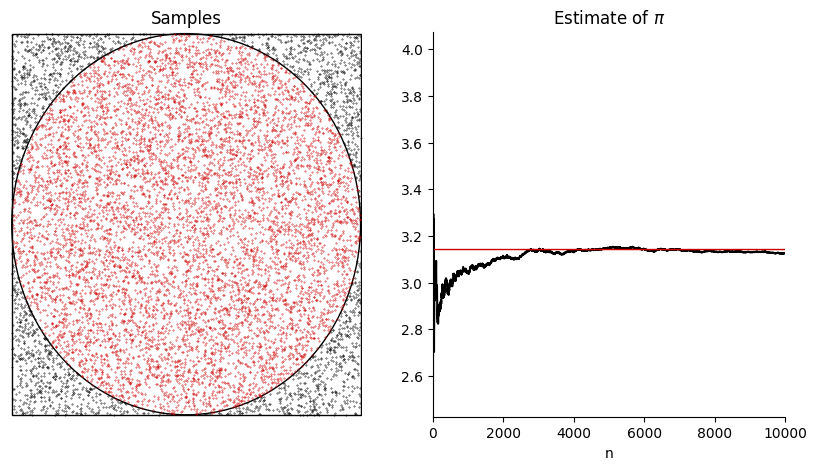

In [27]:
rng = np.random.default_rng(42) # calling it again to have consistent generation in the cell

N = 10000
pi_estimate = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
inside_circle = np.array([[], []]) # for colouring
outside_circle = np.array([[], []]) # for colouring
inside = 0 # for counting the number of points inside the circle

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

printIndex = 0

x = rng.uniform(0, 1, N) * 2 - 1 # to draw from [-1, 1]
y = rng.uniform(0, 1, N) * 2 - 1 # to draw from [-1, 1]

for n in range(N):

    # We will see the reason for this in next weeks

    if x[n]**2 + y[n]**2 < 1:
        inside += 1
        inside_circle = np.append(inside_circle, [[x[n]], [y[n]]], axis=1)
    else:
        outside_circle = np.append(outside_circle, [[x[n]], [y[n]]], axis=1)


    pi_estimate[n] = 4 * inside / (n + 1)


axs[0].cla()
axs[0].add_patch(plt.Circle((0, 0), 1, color='k', fill=False))
axs[0].add_patch(plt.Rectangle((-1, -1), 2, 2, color='k', fill=False))
axs[0].scatter(inside_circle[0, :], inside_circle[1, :], s=0.1, color=[0.8, 0, 0])
axs[0].scatter(outside_circle[0, :], outside_circle[1, :], s=0.1, c='k')
axs[0].set_title("Samples")
# remove the box around the plot and xticks and yticks
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlim(-1.01, 1.01)
axs[0].set_ylim(-1.01, 1.01)
axs[1].cla()
axs[1].plot(pi_estimate[:N], color='k')
axs[1].plot(np.pi * np.ones(N), c=[0.8, 0, 0], lw=1)
axs[1].set_xlim(0, N)
axs[1].set_title("Estimate of $\pi$")
axs[1].set_xlabel("n")
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.show()


### Discrete Probability on a Computer

Before we delve into complicated sampling problems, we can start with how to define, plot, and visualise discrete probability distributions. The best way to represent a discrete probability distribution on a computer is through its _states_ and _probabilities_. For example, consider the following discrete probability distribution for a random variable $X$:
\begin{align*}
\mathbb{P}(X = 0) = 0.2, \quad \mathbb{P}(X = 1) = 0.3, \quad \mathbb{P}(X = 2) = 0.5.
\end{align*}
We can represent this distribution as a list of states and a list of probabilities. For example, we can define the states as follows:
\begin{align*}
\mathsf{s} = [0, 1, 2]
\end{align*}
and the probabilities as follows:
\begin{align*}
\mathsf{w} = [0.2, 0.3, 0.5].
\end{align*}
In code this would correspond to the following.

<StemContainer object of 3 artists>

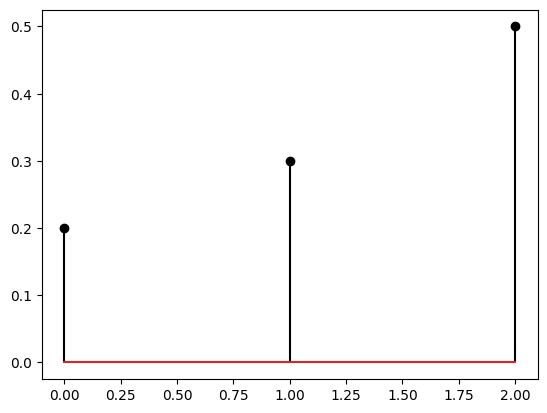

In [29]:
rng = np.random.default_rng(42)
s = [0, 1, 2]
p = [0.2, 0.3, 0.5]

plt.stem(s, p, markerfmt='ko', linefmt='k')


We can also easily plot its CDF.

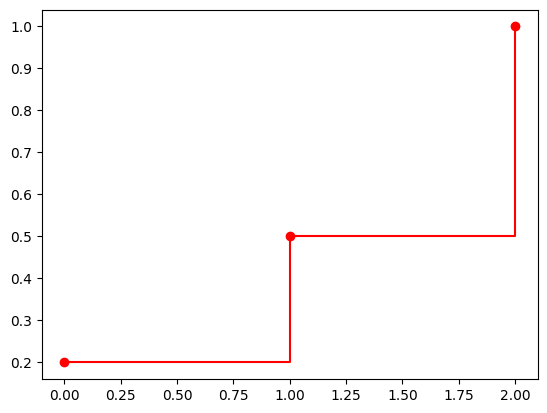

In [31]:
cdf = np.cumsum(p)

plt.plot(s, cdf, 'ro-', drawstyle='steps-post')